In [2]:
%matplotlib inline

import numpy as np
import collections
from collections import OrderedDict, Counter, defaultdict
import pandas as pd

import Bio
from Bio import SeqIO
from Bio.Seq import Seq

import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show 
import matplotlib.patches as patches    
from matplotlib import colors


import glob

import subprocess
from subprocess import call

import re

import pickle

from Bio.SubsMat import MatrixInfo
import Bio.Data.CodonTable

from scipy import stats


from Bio.SubsMat import MatrixInfo
import Bio.Data.CodonTable

import joypy

import pyBigWig

# Metadata 

In [3]:
path = '/home/alla/make_PhD_great_again/NTE/VERSION_since_May2021/'

# gencode 25
metadata_pc_g25 = pd.read_csv(path+'tmp_res/metadata_pc_g25.txt', sep='\t')
metadata_pc_g25['tr_id1'] = [x.split('.')[0] for x in metadata_pc_g25['tr_id'].tolist()] 

# GENES/TRANSCRIPTS with KNOWN SOLE nonAUG 

In [4]:
d = [
    ['EIF4G2', 493, 1111, 'ENST00000339995', 'GTG'],  # nonAUG, dAUG1, tr_id 
     ['BAG1', 88, 301, 'ENST00000472232', 'CTG'], 
     ['R3HCC1', 269, 830, 'ENST00000265806', 'CTG'], 
     ['GTF3A', 195, 900, 'ENST00000381140', 'CTG'], 
     ['DDX17', 76, 313, 'ENST00000403230', 'CTG'], 
     ['RNF187', 429, 756, 'ENST00000305943', 'CTG'],
     #['HCK', 229, 292, 'ENST00000375862'], 
     ['NELFB', 194, 338, 'ENST00000343053', 'CTG'], 
     ['NPTXR', 125, 158, 'ENST00000333039', 'CTG'], 
     ['NPW', 383, 539, 'ENST00000329610', 'CTG'], 
     ['PIGX', 176, 299, 'ENST00000392391', 'CTG'],
     ['PRPS1L1', 82, 283,'ENST00000506618', 'ACG'],
     #['PRR16', 181, 232, 'ENST00000446965'],
     ['SLC22A17', 120, 453, 'ENST00000397260', 'CTG'], 
     #['SP3', 385, 1036, 'ENST00000418194'],
     ['PIGX', 176, 299, 'ENST00000392391', 'CTG'], 
     ['SWI5', 120, 438, 'ENST00000608796', 'CTG'],
     ['TXNRD3', 166, 712, 'ENST00000524230', 'CTG'],
     ['CCDC8', 565, 775, 'ENST00000307522', 'CTG']   
]

df = pd.DataFrame(d, columns = ['gene', 'nonAUG_start', 'dAUG1_start', 'tr_id1', 'codon'])
df['dist_bw_nonAUG_and_dAUG1'] = df['dAUG1_start'] - df['nonAUG_start']

li = []
for el in metadata_pc_g25[['tr_id1', 'transcript_seq']].merge(df, on='tr_id1', how='inner').to_numpy():
    tr_id1 = el[0]
    tr_seq = el[1]
    nonAUG = el[3]
    AUG = el[4]
    seq = tr_seq[nonAUG-1:AUG-1+3]
    GC = (seq.count('G') + seq.count('C')) / len(seq)
    
    # GC content for 20 codons downstream 
    seq1 = tr_seq[nonAUG-1:nonAUG-1+3*20]
    GC1 = (seq1.count('G') + seq1.count('C')) / len(seq1)
    
    li.append([tr_id1, GC, GC1])
    
df = pd.DataFrame(li, columns = ['tr_id1', 'GC', 'GC_20codons']).merge(df, on='tr_id1', how='inner')
df

,tr_id1,GC,GC_20codons,gene,nonAUG_start,dAUG1_start,codon,dist_bw_nonAUG_and_dAUG1
0,ENST00000305943,0.809091,0.866667,RNF187,429,756,CTG,327
1,ENST00000524230,0.568306,0.800000,TXNRD3,166,712,CTG,546
2,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
3,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
4,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
5,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
6,ENST00000506618,0.509804,0.483333,PRPS1L1,82,283,ACG,201
7,ENST00000265806,0.609929,0.566667,R3HCC1,269,830,CTG,561
8,ENST00000472232,0.800926,0.816667,BAG1,88,301,CTG,213
9,ENST00000608796,0.610592,0.700000,SWI5,120,438,CTG,318


In [4]:
seq

'CTGAAGTTCCTGGCCGTGCTGCTGGCCGCGGGCATG'

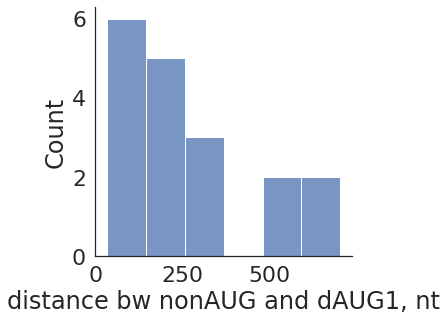

In [5]:
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.displot(df, x="dist_bw_nonAUG_and_dAUG1") # 
ax.set(xlabel='distance bw nonAUG and dAUG1, nt', ylabel='Count')

In [6]:
metadata_pc_g25['tr_len'] = metadata_pc_g25['transcript_seq'].str.len()
tmp = metadata_pc_g25[(metadata_pc_g25['cds_start_pos'] > 0) & 
                (metadata_pc_g25['cds_stop_pos'] < metadata_pc_g25['tr_len']) & 
                (metadata_pc_g25['cds_start_codon'] == 'ATG') & 
                (~metadata_pc_g25['gene'].isin(df['gene'].tolist())) & 
                (~metadata_pc_g25['tr_id'].str.contains('PAR'))][['tr_id', 'transcript_seq', 
                                                                  'cds_start_pos', 'cds_start_codon', 
                                                                 'gene']]
# choose 1 transcript per gene randomly 
tmp = tmp.groupby('gene').first().reset_index()


d = []

for el in tmp.to_numpy():
    tr_id = el[1]
    tr_seq = el[2]
    cds_start = el[3]
    
    subseq_triplets = [tr_seq[cds_start:][i:i+3] for i in range(0, len(tr_seq[cds_start:]) // 3, 3)]
    if 'ATG' in subseq_triplets[1:]:
        loc_1st_ATG = subseq_triplets[1:].index('ATG') * 3 + cds_start
        seq = tr_seq[cds_start:loc_1st_ATG+3]
        GC_content = (seq.count('G') + seq.count('C')) / len(seq)
        
        #GC content 20 codons downstream 
        seq1 = tr_seq[cds_start:cds_start+20*3]
        GC_20codons = (seq1.count('G') + seq1.count('C')) / len(seq1)
        d.append([tr_id, cds_start, loc_1st_ATG, seq, loc_1st_ATG-cds_start, GC_content, GC_20codons])
    else:
        loc_1st_ATG = None
        #GC content 20 codons downstream 
        seq1 = tr_seq[cds_start:cds_start+20*3]
        GC_20codons = (seq1.count('G') + seq1.count('C')) / len(seq1)
        
        d.append([tr_id, cds_start, loc_1st_ATG, None, None, None, GC_20codons])
    
    
dist = pd.DataFrame(d, columns = ['tr_id', 'cds_start', 'dAUG1', 'seq', 'dist', 'GC_content', 'GC_20codons']) 
dist

,tr_id,cds_start,dAUG1,seq,dist,GC_content,GC_20codons
0,ENST00000263100.7,62,65.0,ATGTCC,3.0,0.500000,0.566667
1,ENST00000374001.6,140,389.0,ATGGAATCAAATCACAAATCCGGGGATGGATTGAGCGGCACTCAGA...,249.0,0.468254,0.516667
2,ENST00000318602.11,308,398.0,ATGGGGAAGAACAAACTCCTTCATCCAAGTCTGGTTCTTCTCCTCT...,90.0,0.516129,0.516667
3,ENST00000299698.11,180,201.0,ATGTGGGCTCAGCTCCTTCTAGGA,21.0,0.541667,0.500000
4,ENST00000401850.5,490,595.0,ATGTCCAAGCCCCCCGACCTCCTGCTGCGGCTGCTCCGGGGCGCCC...,105.0,0.629630,0.750000
...,...,...,...,...,...,...,...
18839,ENST00000612017.4,647,737.0,ATGAGTCAGATTTCAGAAGCACTGAGCCGATACAGGAACAGATCAT...,90.0,0.451613,0.416667
18840,ENST00000545132.5,187,211.0,ATGCCCGAGGACCAGGCCGGCGCAGCC,24.0,0.777778,0.616667
18841,ENST00000322764.9,345,510.0,ATGGCGGCCCCCCGCCCGTCTCCCGCGATCTCCGTTTCGGTCTCGG...,165.0,0.708333,0.683333
18842,ENST00000381638.6,125,527.0,ATGGGGAACGCTCCGAGTCACAGCAGTGAAGACGAAGCGGCAGCTG...,402.0,0.698765,0.666667


/home/alla/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/alla/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


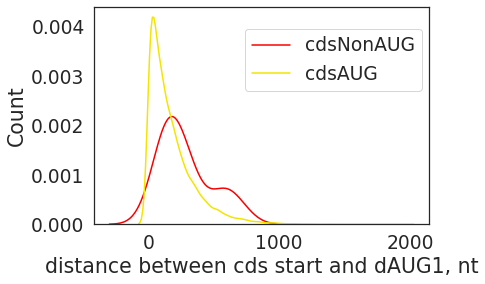

In [7]:

sns.set(font_scale=1.7)
sns.set_style("white")
sns.set_palette("nipy_spectral_r")
ax = sns.distplot(df['dist_bw_nonAUG_and_dAUG1'], hist=False, rug=False)
ax = sns.distplot(dist['dist'].tolist(), hist=False, rug=False)
ax.set(xlabel='distance between cds start and dAUG1, nt', ylabel='Count')
plt.legend(labels=['cdsNonAUG', 'cdsAUG'], bbox_to_anchor=(0.45, 0.9), loc=2, borderaxespad=0.)

/home/alla/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


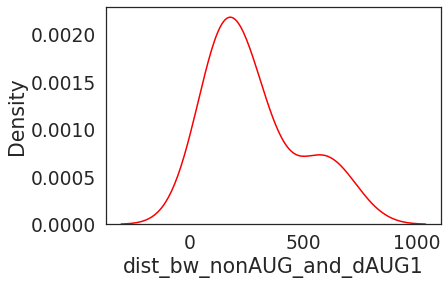

In [8]:
sns.set_palette("nipy_spectral_r")
ax = sns.distplot(df['dist_bw_nonAUG_and_dAUG1'], hist=False, rug=False)

# GC-content for cdsNonAUG regions and dAUG1 vs cdsAUG and dAUG1

In [9]:
# number of GC / length of region 
# dist['GC_content'].tolist(), df['GC'].tolist()
# note that regions between sole nonAUG and dAUG1 are shorter than AUG and dAUG1 

/home/alla/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/alla/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


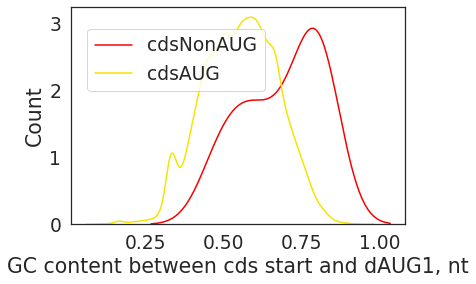

In [10]:
sns.set(font_scale=1.7)
sns.set_style("white")
sns.set_palette("nipy_spectral_r")
ax = sns.distplot(df['GC'].tolist(), hist=False, rug=False)
ax = sns.distplot(dist['GC_content'].tolist(), hist=False, rug=False)
ax.set(xlabel='GC content between cds start and dAUG1, nt', ylabel='Count')

plt.legend(labels=['cdsNonAUG', 'cdsAUG'], bbox_to_anchor=(0.05, 0.9), loc=2, borderaxespad=0.)

/home/alla/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


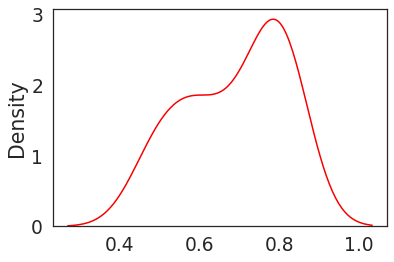

In [11]:
ax = sns.distplot(df['GC'].tolist(), hist=False, rug=False)

/home/alla/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/alla/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


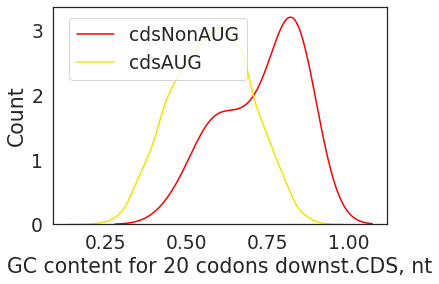

In [12]:
sns.set(font_scale=1.7)
sns.set_style("white")
sns.set_palette("nipy_spectral_r")
ax = sns.distplot(df['GC_20codons'].tolist(), hist=False, rug=False)
ax = sns.distplot(dist['GC_20codons'].tolist(), hist=False, rug=False)
ax.set(xlabel='GC content for 20 codons downst.CDS, nt', ylabel='Count')

plt.legend(labels=['cdsNonAUG', 'cdsAUG'], bbox_to_anchor=(0.05, 0.95), loc=2, borderaxespad=0.)

# sink ORFs in human transcripts 

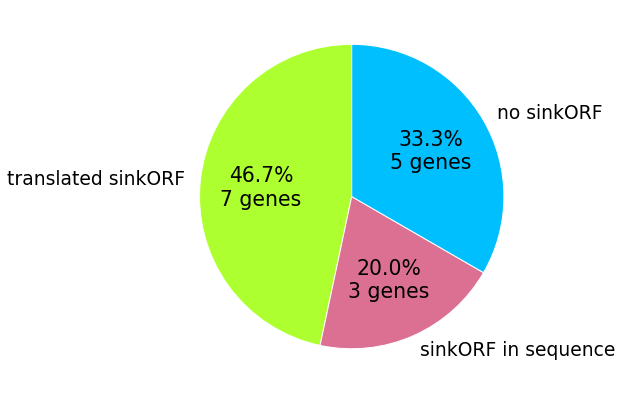

In [13]:
data = [7, 3, 5] # percentage 
labels = ['translated sinkORF', 'sinkORF in sequence', 'no sinkORF']
colors_ = ['greenyellow', 'palevioletred', 'deepskyblue']

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d} genes".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = labels,
                                  colors = colors_,
                                  startangle = 90,
                                  textprops = dict(color ="black"))


In [14]:
df[df['gene'].isin(['DDX17', 'NPTXR', 'PIGX', 'NPW',  'RNF187'])]

,tr_id1,GC,GC_20codons,gene,nonAUG_start,dAUG1_start,codon,dist_bw_nonAUG_and_dAUG1
0,ENST00000305943,0.809091,0.866667,RNF187,429,756,CTG,327
2,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
3,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
4,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
5,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
14,ENST00000329610,0.761006,0.833333,NPW,383,539,CTG,156
16,ENST00000403230,0.700000,0.600000,DDX17,76,313,CTG,237
17,ENST00000333039,0.694444,0.683333,NPTXR,125,158,CTG,33


In [15]:
df.sort_values(by='dist_bw_nonAUG_and_dAUG1')

,tr_id1,GC,GC_20codons,gene,nonAUG_start,dAUG1_start,codon,dist_bw_nonAUG_and_dAUG1
17,ENST00000333039,0.694444,0.683333,NPTXR,125,158,CTG,33
2,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
3,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
4,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
5,ENST00000392391,0.809524,0.833333,PIGX,176,299,CTG,123
10,ENST00000343053,0.823129,0.850000,NELFB,194,338,CTG,144
14,ENST00000329610,0.761006,0.833333,NPW,383,539,CTG,156
6,ENST00000506618,0.509804,0.483333,PRPS1L1,82,283,ACG,201
15,ENST00000307522,0.582160,0.583333,CCDC8,565,775,CTG,210
8,ENST00000472232,0.800926,0.816667,BAG1,88,301,CTG,213


# Download and parse alignments for 5'UTR, nonAUG, dAUG1, 4nt

In [16]:
!ls

0_scan_annotations_G25_G41_for_nonAUG_sole_starts.ipynb
1_hypothesis_cdsAUGs_are_not_conseved_thus_internal.ipynb
2_R_global_coo.ipynb
4_RiboSeq_profiles_for_known_genes_GENCODE41.ipynb
5_sequence_and_aln_stats.ipynb
5_transcirptomic_data.ipynb
bar.png
careful_with_frames_3_predicted_nonAUG_proteoforms_with_tripsviz.ipynb
data
download_elong_and_init_profiles.py
INIT_2.pkl
INIT_3.pkl
out_counts.pkl
out_df_frames.pkl
out_df_frames_un.pkl
profiles_known_genes
Till_October_2022
tmp_res


In [17]:
df.merge(metadata_pc_g25[['tr_id', 'tr_id1']], on='tr_id1', how='inner')[['tr_id', 'nonAUG_start', 'dAUG1_start']].to_csv('tmp_res/known_sole_nonAUG_local_coo.txt', sep='\t', index=False)

In [18]:
def prepare_global_coo(path_to_file_with_global_coo, colname):
    global_coo_g25 = pd.read_csv(path_to_file_with_global_coo, sep='\t')
    global_coo_g25_f = global_coo_g25[global_coo_g25['hit'] == True]
    global_coo_g25_f = global_coo_g25_f.sort_values(by=['seqnames', 'start'])
    
    global_coo_g25_f['global_coo'] = global_coo_g25_f['seqnames']+':'+global_coo_g25_f['start'].astype(str) +'-'+global_coo_g25_f['end'].astype(str)
    global_coo_g25_f = global_coo_g25_f[['group_name', 'strand', 'global_coo']].groupby(['group_name', 'strand']).agg('+'.join).reset_index()
    global_coo_g25_f.columns = ['tr_id', 'strand', colname]
    return global_coo_g25_f

In [19]:
# tmp_res/known_sole_nonAUG_local_coo.txt

primary_global = prepare_global_coo(path_to_file_with_global_coo='tmp_res/known_sole_nonAUG_global_coo.txt',
                                   colname = 'global_coo')

df = df.merge(metadata_pc_g25[['tr_id', 'tr_id1']], on='tr_id1', how='inner').merge(primary_global)

df = df.drop_duplicates()

df[0:2]

,tr_id1,GC,GC_20codons,gene,nonAUG_start,dAUG1_start,codon,dist_bw_nonAUG_and_dAUG1,tr_id,strand,global_coo
0,ENST00000305943,0.809091,0.866667,RNF187,429,756,CTG,327,ENST00000305943.7,+,chr1:228487061-228487823
1,ENST00000524230,0.568306,0.800000,TXNRD3,166,712,CTG,546,ENST00000524230.6,-,chr3:126644019-126644053+chr3:126644297-126644...


In [20]:
# KNOWN_SOLE_nonAUG_ALN

In [21]:
def get_aln(fasta_input):
    aln_col = []
    ids_li = []
    
    with open(fasta_input, 'r') as input_handle:
        for record in SeqIO.parse(input_handle, "fasta"):
            seq = str(record.seq)
            ids = str(record.id)
            aln_col.append([seq[i:i+1] for i in range(0, len(seq), 1)])
            ids_li.append(ids)
    return aln_col, ids_li

def re_index_with_gaps(aln_col):
    new_col_ind = []

    # take ref seq
    counter_pos = 0 # to exclude '-'

    for col in pd.DataFrame(aln_col).to_numpy()[0]:
        if (col == '-') | (col == '.'): # UCC UGA C = TCC TGA C
            new_col_ind.append(counter_pos)
        else: 
            counter_pos += 1
            new_col_ind.append(counter_pos)
    
    return new_col_ind


def slice_aln(aln_col, new_col_ind, a, b):
    fr_stop_motif_array = []
    for row in pd.DataFrame(aln_col).to_numpy():
        tmp = []
        for ind, col in zip(new_col_ind, row):
            if (ind >= a) & (ind <= b):
                tmp.append(col)
            
        fr_stop_motif_array.append(tmp)
    
    return fr_stop_motif_array


In [22]:
gene_list = df['gene'].tolist()

li = []

for gene in gene_list: 
    aln_col, ids_li = get_aln('data/KNOWN_SOLE_nonAUG_ALN/%s.fasta' % gene)

    new_col_ind = re_index_with_gaps(aln_col)

    a = df[df['gene'] == gene].iloc[0].nonAUG_start+3 # cdsNonAUG
    b = df[df['gene'] == gene].iloc[0].dAUG1_start #-1+3 #dAUG1

    bw_starts_array = slice_aln(aln_col, new_col_ind, a, b)

    
    number_of_in_frame_ATGs = 0
    
    number_of_species_in_aln = len(bw_starts_array)
    
    species_with_in_frame_ATG = []
    
    for specie_seq, specie in zip(bw_starts_array, ids_li):
        
        seq = ''.join(specie_seq)
        triplets = [seq[i:i+3] for i in range(0, len(seq), 3)]
        number_of_in_frame_ATGs += triplets.count('ATG')
        if triplets.count('ATG') != 0:
            species_with_in_frame_ATG.append(specie)
            
        if gene == 'TXNRD3':
            if specie == 'Human':
                print (a, b, specie, ''.join(specie_seq))

            
        
        
    # normalise number_of_in_frame_ATGs by number of species and length of the region  
    number_of_in_frame_ATGs_normalised =  number_of_in_frame_ATGs / (number_of_species_in_aln*(b-a))  

    li.append([gene, number_of_species_in_aln, 
               number_of_in_frame_ATGs, b-a, 
               ', '.join(species_with_in_frame_ATG), 
               number_of_in_frame_ATGs_normalised])

169 712 Human GAGCGGTCGCCGCCGCAGTCGCCCGGGCCGGGAAAGGCGGGCGATGCCCCCAACCGCCGCTCGGGCCATGTCCGAGGGGCGCGCGTGTTGTCGCCGCCGGGGCGCCGTGCCCGCCTGTCGTCCCCCGGGCCCAGCCGCTCGTCCGAGGCCCGCGAGGAGCTGCGCCGCCACCTCGTGGGCCTCATCGAGCGCAGCCGGGTGGTGATCTTCAGCAAGAGCTACTGTCCCCATAGTACTCGGGTGAAAGAACTCTTTTCTTCTTTGGGAGTCGAATGTAATGTCTTGGAACTTGATCAAGTTGATGATGGGGCCAGGGTTCAAGAAGTGCTGTCAGAAATCACTAATCAGAAAACTGTGCCCAATATTTTCGTGAATAAAGTGCATGTAGGTGGATGTGACCAAACTTTCCAGGCATATCAGAGTGGTTTGTTACAGAAGCTCCTTCAGGAAGATTTGGCATATGATTATGATCTCATCATCATCGGTGGTGGTTCTGGAGGCCTTTCATGTGCGAAGGAAGCTGCCATTTTGGGAAAGAAAGTTA


In [23]:
dAUG1_aln = pd.DataFrame(li, columns = ['gene', 'number_of_species_in_aln', 
                            'number_of_in_frame_AUGs', 'dist nt', 
                            'species_with_in_frame_ATG', 'number_of_in_frame_ATGs_normalised'])

dAUG1_aln

,gene,number_of_species_in_aln,number_of_in_frame_AUGs,dist nt,species_with_in_frame_ATG,number_of_in_frame_ATGs_normalised
0,RNF187,107,57,324,"Gibbon, Marmoset, Tarsier, Chinese_hamster, Up...",0.001644
1,TXNRD3,119,175,543,"Rhesus, Crab_eating_macaque, Pig_tailed_macaqu...",0.002708
2,PIGX,119,2,120,"Pika, Cape_elephant_shrew",0.000140
3,PRPS1L1,112,23,198,"Lesser_Egyptian_jerboa, Upper_Galilee_mountain...",0.001037
4,R3HCC1,120,27,558,"Orangutan, Squirrel_monkey, Chinese_hamster, G...",0.000403
5,BAG1,107,1,210,Cape_rock_hyrax,0.000045
6,SWI5,120,12,315,"Prairie_vole, Mouse, Ryukyu_mouse, Shrew_mouse...",0.000317
7,NELFB,90,0,141,,0.000000
8,EIF4G2,120,0,615,,0.000000
9,GTF3A,118,79,702,"Orangutan, Gibbon, Tarsier, Prairie_vole, Chin...",0.000954


In [24]:
dAUG1_aln['number_of_in_frame_AUGs/#species'] = dAUG1_aln['number_of_in_frame_AUGs'] / dAUG1_aln['number_of_species_in_aln']

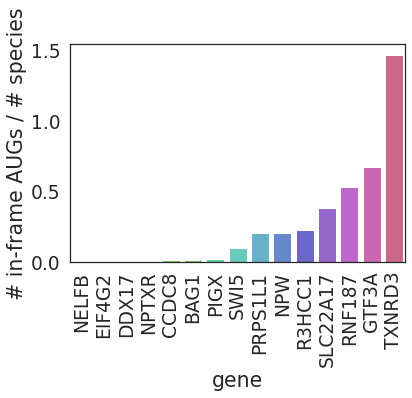

In [25]:
# total number of in-frame AUGs in all species 
ax = sns.barplot(x = 'gene', y = 'number_of_in_frame_AUGs/#species', 
            data = dAUG1_aln,
            palette = 'hls', 
            order= dAUG1_aln.sort_values(by='number_of_in_frame_AUGs/#species')['gene'].tolist()
            )
plt.xticks(rotation=90)
ax.set_ylabel('# in-frame AUGs / # species')

plt.show()

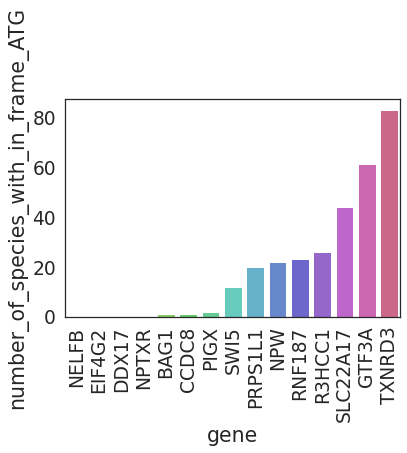

In [26]:
# how many species contain in-frame AUGs 

dAUG1_aln['number_of_species_with_in_frame_ATG'] = [len(x.split(',')) if x != '' else 0 for x in dAUG1_aln['species_with_in_frame_ATG'].tolist()]

sns.barplot(x = 'gene', y = 'number_of_species_with_in_frame_ATG', 
            data = dAUG1_aln,
            palette = 'hls', 
            order= dAUG1_aln.sort_values(by='number_of_species_with_in_frame_ATG')['gene'].tolist()
            )
plt.xticks(rotation=90)

plt.show()

# Average distance till the 1st in-frame AUG in species 

In [27]:
df[df['gene'] == 'TXNRD3'].iloc[0].global_coo

'chr3:126644019-126644053+chr3:126644297-126644401+chr3:126646111-126646220+chr3:126647236-126647296+chr3:126654748-126655155'

# Check the presense of extension in other species: the same or ATG or near-cognate start and triplecity is saved 

In [28]:
li = {}
stata = {}
#dAUG1_stata = {}

for gene in ['PRPS1L1', 'NPTXR', 'DDX17', 'RNF187', 'TXNRD3','NELFB', 'NPW', 
             'BAG1', 'GTF3A', 'PIGX', 'CCDC8', 'SLC22A17', 'R3HCC1','SWI5', 'EIF4G2']: 
    aln_col, ids_li = get_aln('data/KNOWN_SOLE_nonAUG_ALN/%s.fasta' % gene)

    new_col_ind = re_index_with_gaps(aln_col)
    a = df[df['gene'] == gene].iloc[0].nonAUG_start # cdsNonAUG
    b = df[df['gene'] == gene].iloc[0].nonAUG_start-1+3 #-1+3 #dAUG1
    bw_starts_array = slice_aln(aln_col, new_col_ind, a, b)
    ref_codon = ''.join(bw_starts_array[0]).replace('-', '').replace('.', '')
    print (ref_codon)

    number_of_species_in_aln = len(bw_starts_array)
    nc_codons_ex_ref =set(['CTG', 'GTG', 'TTG', 'ACG', 'AAG', 'AGG', 'ATT', 'ATA', 'ATC']) - set([ref_codon])
    
    d = {}
    d1 = {'ref_codon':0, 'ATG':0, 'other_nc':0, 'other_codons':0, 'misaln/gaps':0}
    for specie_seq, specie in zip(bw_starts_array, ids_li):
        seq = ''.join(specie_seq)
        #triplets = [seq[i:i+3] for i in range(0, len(seq), 3)]
        #start_codon = triplets[0]
        #dAUG1_codon = triplets
        start_codon = ''.join(specie_seq).replace('-', '').replace('.', '')
        d[specie] = start_codon
        
        if start_codon == ref_codon:
            d1['ref_codon'] += 1
        elif start_codon == 'ATG':
            d1['ATG'] += 1
        elif start_codon in nc_codons_ex_ref:
            d1['other_nc'] += 1
        # if start codon is smth like --C or G.G
        elif (start_codon.find('.') != -1) | (start_codon.find('-') != -1):
            d1['misaln/gaps'] += 1
            #print (start_codon)
        # if it's normal codon like GGC, AAA
        else:
            d1['other_codons'] += 1
            
            
        # dAUG1_stata
       
    stata[gene] = d1
    
    li[gene] = d

ACG
CTG
CTG
CTG
CTG
CTG
CTG
CTG
CTG
CTG
CTG
CTG
CTG
CTG
GTG


In [29]:
li = []

for gene, v in stata.items():
    for class_, count in v.items():
        li.append([gene, class_, count])
        

df1 = pd.DataFrame(li)

#df1[df1[1] == 'ref_codon'].sort_values(by=2)[0].tolist()

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)


    plt.legend(bbox_to_anchor=(1, 1),frameon=False)
    plt.xticks(rotation=90)

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")


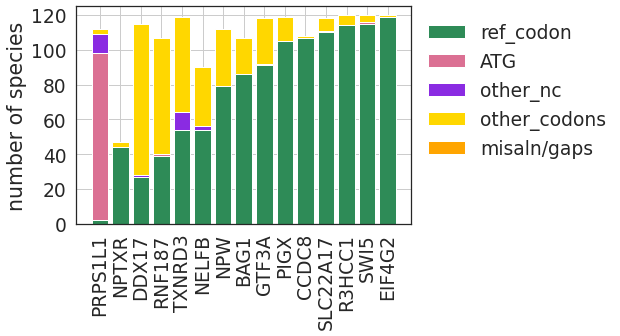

In [31]:
data = []


category_labels = ['PRPS1L1', 'NPTXR', 'DDX17', 'RNF187', 'TXNRD3','NELFB', 'NPW', 
             'BAG1', 'GTF3A', 'PIGX', 'CCDC8', 'SLC22A17', 'R3HCC1','SWI5', 'EIF4G2']

series_labels = ['ref_codon', 'ATG', 'other_nc', 'other_codons', 'misaln/gaps']


for label in series_labels:
    data.append(df1[df1[1] == label][2].tolist())

plt.figure(figsize=(6, 4))

series_labels = ['ref_codon', 'ATG', 'other_nc', 'other_codons', 'misaln/gaps']


category_labels = ['PRPS1L1', 'NPTXR', 'DDX17', 'RNF187', 'TXNRD3','NELFB', 'NPW', 
             'BAG1', 'GTF3A', 'PIGX', 'CCDC8', 'SLC22A17', 'R3HCC1','SWI5', 'EIF4G2']

plot_stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=False, 
    #value_format="{:.1f}",
    colors=['seagreen', 'palevioletred', 'blueviolet', 'gold','orange'],
    #y_label="Quantity (units)"
)

plt.savefig('bar.png')
plt.ylabel('number of species')
plt.ylim(0, 125)
plt.yticks(range(0, 121, 20))
plt.show()

In [32]:
data

[[2, 44, 27, 39, 54, 54, 79, 86, 91, 105, 107, 110, 114, 115, 119],
 [96, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [11, 0, 1, 0, 10, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [3, 3, 87, 67, 55, 34, 33, 21, 26, 14, 1, 7, 6, 4, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# Check if dAUG1 is not conserved: count #of AUGs, near-cognates and others 

In [33]:
#metadata_pc_g25[metadata_pc_g25['gene'] == 'NPTXR'].iloc[0].transcript_seq[157:]

In [34]:
len('ATTAGAGTCTGTGCTTCACTTCCGTTCCAGCCTCAGCGGCAGCTGGATCGCTCGACGGAGTGCCTCTGGTAGTTGGCCAAGACGCCGAATATCAAAATCTTCAGCGGCAGCTCCCACCAGGACTTATCCCAGAAAATTGCTGACCGCCTGGGCCTGGAGCTAGGCAAGGTGGTGACTAAGAAATTCAGCAACCAGGAGACCTGCGTGGAAATTGATGAGAGTGTGCGTGGAGAGGATGTCTACATCGTTCAGAGTGGTTGTGGCGAAATCAACGACAGTCTAA')

283

In [35]:
dAUG1_stata = {}

for gene in ['PRPS1L1', 'NPTXR', 'DDX17', 'RNF187', 'TXNRD3','NELFB', 'NPW', 
             'BAG1', 'GTF3A', 'PIGX', 'CCDC8', 'SLC22A17', 'R3HCC1','SWI5', 'EIF4G2']: 
    aln_col, ids_li = get_aln('data/KNOWN_SOLE_nonAUG_ALN/%s.fasta' % gene)

    new_col_ind = re_index_with_gaps(aln_col)
    a = df[df['gene'] == gene].iloc[0].dAUG1_start 
    b = df[df['gene'] == gene].iloc[0].dAUG1_start-1+3 

    bw_starts_array = slice_aln(aln_col, new_col_ind, a, b)
    ref_codon = ''.join(bw_starts_array[0]).replace('-', '').replace('.', '')
    print (gene, ref_codon)

    number_of_species_in_aln = len(bw_starts_array)
    nc_codons_ex_ref =set(['CTG', 'GTG', 'TTG', 'ACG', 'AAG', 'AGG', 'ATT', 'ATA', 'ATC']) 
    
    d1 = {'ATG':0, 'near-cognates':0, 'other_codons':0, 'misaln/gaps':0}
    for specie_seq, specie in zip(bw_starts_array, ids_li):
        codon = ''.join(specie_seq).replace('-', '').replace('.', '')
        print (specie, codon)
        #if gene == 'NPTXR':
            #print (codon, a, b)
        if codon == 'ATG':
            d1['ATG'] += 1
        elif codon in nc_codons_ex_ref:
            d1['near-cognates'] += 1
        elif (codon.find('.') != -1) | (codon.find('-') != -1):
            d1['misaln/gaps'] += 1
        else:
            d1['other_codons'] += 1
            
    dAUG1_stata[gene] = d1        

PRPS1L1 ATG
Human ATG
Chimp ATG
Bonobo ATG
Gorilla ATG
Orangutan GTG
Gibbon ATG
Rhesus ATG
Crab_eating_macaque ATG
Pig_tailed_macaque ATG
Baboon ATG
Drill ATG
Sooty_mangabey ATG
Green_monkey ATG
Proboscis_monkey ATG
Golden_snub_nosed_monkey ATG
Black_snub_nosed_monkey ATG
Angolan_colobus ATG
Ugandan_red_Colobus ATG
Marmoset ATG
Mas_night_monkey ATG
Squirrel_monkey ATG
White_faced_sapajou ATG
Tarsier ATG
Bushbaby ATG
Mouse_lemur ATG
Sifaka ATG
Malayan_flying_lemur ATG
Chinese_tree_shrew ATG
Lesser_Egyptian_jerboa 
Prairie_vole ATG
Chinese_hamster ATG
Golden_hamster ATG
Prairie_deer_mouse ATG
Mouse ATG
Ryukyu_mouse ATG
Shrew_mouse AAG
Rat ATG
Mongolian_gerbil 
Upper_Galilee_mountains_blind_mole_rat ACG
American_beaver ATG
Ords_kangaroo_rat ATG
Naked_mole_rat ATG
Damara_mole_rat ATG
Guinea_pig ATG
Chinchilla ATG
Brush_tailed_rat ATG
Squirrel ATG
Alpine_marmot ATG
Rabbit ATG
Alpaca ATG
Wild_bactrian_camel ATG
Bactrian_camel ATG
Arabian_camel ATG
Bottlenose_dolphin ATG
Killer_whale ATG
Belu

NELFB ATG
Human ATG
Chimp ATG
Bonobo ATG
Gorilla ATG
Orangutan ATG
Gibbon ATG
Rhesus ATG
Crab_eating_macaque ATG
Pig_tailed_macaque ATG
Baboon ATG
Sooty_mangabey ATG
Green_monkey ATG
Golden_snub_nosed_monkey ATG
Black_snub_nosed_monkey ATG
Angolan_colobus ATG
Ugandan_red_Colobus ATG
Marmoset AT
Mas_night_monkey ATG
White_faced_sapajou ATG
Bushbaby CTG
Mouse_lemur ATG
Sifaka ATG
Malayan_flying_lemur ATG
Chinese_tree_shrew ATG
Lesser_Egyptian_jerboa ATG
Prairie_vole ATG
Chinese_hamster ATG
Golden_hamster ATG
Prairie_deer_mouse ATG
Mouse ATG
Ryukyu_mouse ATG
Shrew_mouse ATG
Rat ATG
Mongolian_gerbil ATG
Upper_Galilee_mountains_blind_mole_rat ATG
American_beaver ATG
Naked_mole_rat ATG
Damara_mole_rat TTG
Guinea_pig ATG
Chinchilla ATG
Brush_tailed_rat ATG
Squirrel ATG
Alpine_marmot ATG
Bactrian_camel ATG
Arabian_camel ATG
Bottlenose_dolphin ATG
Killer_whale ATG
Beluga_whale ATG
Yangtze_river_dolphin ATG
Minke_whale ATG
Cow CTA
Water_buffalo CTG
Goat CTG
White_tailed_deer CTG
Red_deer CTG
Pig

SLC22A17 ATG
Human ATG
Chimp ATG
Bonobo ATG
Gorilla ATG
Orangutan ATG
Gibbon ATG
Rhesus ATG
Crab_eating_macaque ATG
Pig_tailed_macaque ATG
Baboon ATG
Drill ATG
Sooty_mangabey ATG
Green_monkey ATG
Proboscis_monkey ATG
Golden_snub_nosed_monkey ATG
Black_snub_nosed_monkey ATG
Angolan_colobus ATG
Ugandan_red_Colobus ATG
Marmoset ATG
Mas_night_monkey ATG
Squirrel_monkey ATG
White_faced_sapajou ATG
Tarsier 
Bushbaby TTG
Mouse_lemur TTG
Sifaka TTG
Malayan_flying_lemur ATG
Chinese_tree_shrew ATG
Lesser_Egyptian_jerboa ATG
Prairie_vole ATG
Chinese_hamster 
Golden_hamster ATG
Prairie_deer_mouse ATG
Mouse ATG
Ryukyu_mouse ATG
Shrew_mouse ATG
Rat ATG
Mongolian_gerbil ATG
Upper_Galilee_mountains_blind_mole_rat ATG
American_beaver ATG
Ords_kangaroo_rat ATG
Naked_mole_rat TTG
Damara_mole_rat TTG
Guinea_pig TTG
Chinchilla TTG
Brush_tailed_rat TTG
Squirrel CTG
Alpine_marmot CTG
Rabbit ATG
Pika ATG
Alpaca TTG
Wild_bactrian_camel TTG
Bactrian_camel TTG
Arabian_camel 
Killer_whale ATG
Beluga_whale ATG
Yan

In [36]:
li = []

for gene, v in dAUG1_stata.items():
    for class_, count in v.items():
        li.append([gene, class_, count])
        

df2 = pd.DataFrame(li)

df2

,0,1,2
0,PRPS1L1,ATG,104
1,PRPS1L1,near-cognates,4
2,PRPS1L1,other_codons,4
3,PRPS1L1,misaln/gaps,0
4,NPTXR,ATG,43
5,NPTXR,near-cognates,0
6,NPTXR,other_codons,4
7,NPTXR,misaln/gaps,0
8,DDX17,ATG,103
9,DDX17,near-cognates,0


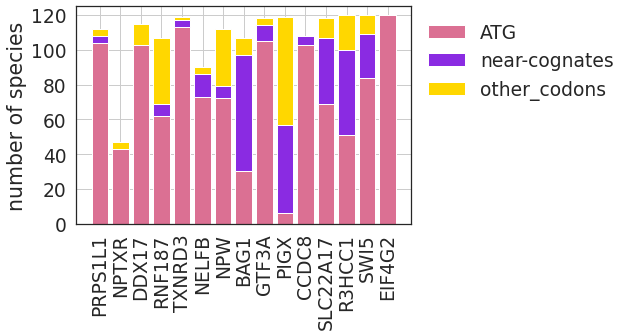

In [37]:
data = []


category_labels = ['PRPS1L1', 'NPTXR', 'DDX17', 'RNF187', 'TXNRD3','NELFB', 'NPW', 
             'BAG1', 'GTF3A', 'PIGX', 'CCDC8', 'SLC22A17', 'R3HCC1','SWI5', 'EIF4G2']

series_labels = ['ATG', 'near-cognates', 'other_codons']


for label in series_labels:
    data.append(df2[df2[1] == label][2].tolist())

plt.figure(figsize=(6, 4))

plot_stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=False, 
    #value_format="{:.1f}",
    colors=['palevioletred', 'blueviolet', 'gold'],
    #y_label="Quantity (units)"
)

plt.savefig('bar.png')
plt.ylabel('number of species')
plt.ylim(0, 125)
plt.yticks(range(0, 121, 20))
plt.show()

In [38]:
df[df['gene'] == 'EIF4G2'].iloc[0].global_coo

'chr11:10803975-10804050+chr11:10804137-10804203+chr11:10804287-10804418+chr11:10804913-10805015+chr11:10805907-10806047+chr11:10806820-10806885+chr11:10807255-10807381+chr11:10808705-10809110'

In [39]:
df[df['gene'] == 'BAG1'].iloc[0].global_coo

'chr9:33264454-33264761'

# Check consistency of cdsNonAUG and dAUG1 part

# dAUG1 in genes with cdsAUG (5'UTR+AUG+4nt) excluding genes with sole noAUG init 

In [40]:
tmp = metadata_pc_g25[(metadata_pc_g25['utr5_end'].notna())]
tmp2 = tmp[tmp['utr5_end'] > 0]

tmp2['tr_len'] = tmp2['transcript_seq'].str.len()
tmp3 = tmp2[tmp2['tr_len'] > tmp2['cds_stop_pos']]

tmp4 = tmp3[tmp3['cds_stop_codon'].isin(['TAG', 'TGA', 'TAA'])]

tmp5_only_AUG = tmp4[tmp4['cds_start_codon'] == 'ATG']

tmp5_only_AUG_sel = tmp5_only_AUG[~tmp5_only_AUG['gene'].isin(df['gene'].tolist())]

print (metadata_pc_g25.shape[0], tmp2.shape[0], tmp3.shape[0], tmp4.shape[0], tmp5_only_AUG.shape[0], tmp5_only_AUG_sel.shape[0])

94359 78873 60109 60065 59948 59938


/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
primary_global = prepare_global_coo(path_to_file_with_global_coo='tmp_res/utr5_cdsATG_4nt_global.txt',
                                   colname = 'global_coo')

In [42]:
AUG_df = tmp5_only_AUG_sel.merge(primary_global, on='tr_id', how='inner')
AUG_df['chrom'] = [x.split(':')[0] for x in AUG_df['global_coo'].tolist()]

print (AUG_df.shape[0])
AUG_df[0:2]

59938


,tr_id,gene,gene_tr,transcript_seq,5UTR_start_seq,CDS_start,cds_seq,cds_start_codon,cds_stop_codon,cds_start_pos,cds_stop_pos,utr5_start,utr5_end,record_id,tr_id1,tr_len,strand,global_coo,chrom
0,ENST00000342066.7,SAMD11,SAMD11-010,CCAGCAGATCCCTGCGGCGTTCGCGAGGGTGGGACGGGAAGCGGGC...,CCAGCAGATCCCTGCGGCGTTCGCGAGGGTGGGACGGGAAGCGGGC...,CTT,ATGTCCAAGGGGATCCTGCAGGTGCATCCTCCGATCTGCGACTGCC...,ATG,TGA,83,2129,0,83,ENST00000342066.7|ENSG00000187634.11|OTTHUMG00...,ENST00000342066,2551,+,chr1:925738-925800+chr1:925922-925948,chr1
1,ENST00000618181.4,SAMD11,SAMD11-204,GCAGATCCCTGCGGCGTTCGCGAGGGTGGGACGGGAAGCGGGCTGG...,GCAGATCCCTGCGGCGTTCGCGAGGGTGGGACGGGAAGCGGGCTGG...,CTT,ATGTCCAAGGGGATCCTGCAGGTGCATCCTCCGATCTGCGACTGCC...,ATG,TGA,80,1751,0,80,ENST00000618181.4|ENSG00000187634.11|OTTHUMG00...,ENST00000618181,2179,+,chr1:925741-925800+chr1:925922-925948,chr1


In [43]:
# select 1 transcript per gene 

AUG_df1 = AUG_df.groupby(by='gene').first().reset_index()
print (AUG_df1.shape[0], AUG_df1.gene.nunique(), AUG_df.shape[0])

18844 18844 59938


In [44]:
#!ls data/ALIGNMENTS/chr1/fasta3/%s.fasta % tr_id
import os.path

In [45]:
dAUG1_stata = {}

gene_count = 0

num_sp_dict = {}

for el in AUG_df1[['tr_id', 'gene', 'cds_start_pos', 'chrom', 'global_coo', 'strand']].to_numpy():
    tr_id = el[0]
    gene = el[1]
    AUG_pos = el[2]
    chrom = el[3]
    global_coo = el[4]
    strand = el[5]
    
    # path to aln file
    if os.path.isfile('data/ALIGNMENTS/%s/fasta3/%s.fasta' % (chrom, tr_id)) is True:
        gene_count += 1
        aln_col, ids_li = get_aln('data/ALIGNMENTS/%s/fasta3/%s.fasta' % (chrom, tr_id))
        new_col_ind = re_index_with_gaps(aln_col)
        a = AUG_df1[AUG_df1['tr_id'] == tr_id].iloc[0].cds_start_pos+1 
        b = AUG_df1[AUG_df1['tr_id'] == tr_id].iloc[0].cds_start_pos+3
        

        bw_starts_array = slice_aln(aln_col, new_col_ind, a, b)
        ref_codon = ''.join(bw_starts_array[0]).replace('-', '').replace('.', '')
        #print (gene, ref_codon, global_coo, strand)

        number_of_species_in_aln = len(bw_starts_array)
        
        num_sp_dict[gene] = number_of_species_in_aln
        nc_codons_ex_ref =set(['CTG', 'GTG', 'TTG', 'ACG', 'AAG', 'AGG', 'ATT', 'ATA', 'ATC']) 

        d1 = {'ATG':0, 'near-cognates':0, 'other_codons':0, 'misaln/gaps':0}
        for specie_seq, specie in zip(bw_starts_array, ids_li):
            codon = ''.join(specie_seq).replace('-', '').replace('.', '')
            #if gene == 'ABL2':
                #print (specie, codon)
            if codon == 'ATG':
                d1['ATG'] += 1
            elif codon in nc_codons_ex_ref:
                d1['near-cognates'] += 1
            elif (codon.find('.') != -1) | (codon.find('-') != -1):
                d1['misaln/gaps'] += 1
            else:
                d1['other_codons'] += 1
            
        dAUG1_stata[gene] = d1        
    

In [46]:
gene_count #1927 genes?? 

18844

In [47]:
tr_n = 0
for chrom in glob.glob('data/ALIGNMENTS/*/fasta3/*'):
    tr_n +=1
    
tr_n

60065

In [49]:
li = []

new_d = {'ATG':[], 'near-cognates':[], 'other_codons':[], 'misaln/gaps':[]}

for gene, v in dAUG1_stata.items():
    for class_, count in v.items():

        num_sp = num_sp_dict[gene] # number of species in aln per gene
        if num_sp >= 50: # threshold in 50 species in aln at least
            new_d[class_].append(count/num_sp)
            li.append([gene, class_, count])
            
        

df2 = pd.DataFrame(li)

df2[0:20]

,0,1,2
0,A1BG,ATG,69
1,A1BG,near-cognates,1
2,A1BG,other_codons,25
3,A1BG,misaln/gaps,0
4,A1CF,ATG,118
5,A1CF,near-cognates,0
6,A1CF,other_codons,2
7,A1CF,misaln/gaps,0
8,A2M,ATG,116
9,A2M,near-cognates,0


In [50]:
aver_d = {}

for category, fraction_li in new_d.items():
    aver_d[category] = np.mean(fraction_li)

aver_d

{'ATG': 0.8730504582441831,
 'near-cognates': 0.040735952862689384,
 'other_codons': 0.08621358889312752,
 'misaln/gaps': 0.0}

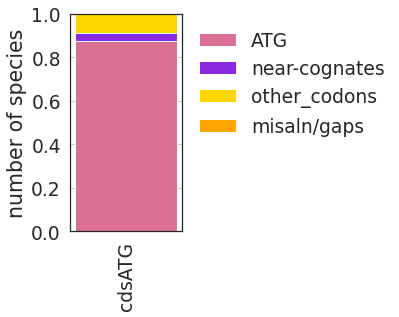

In [51]:
category_labels = ['cdsATG']

series_labels = ['ATG', 'near-cognates', 'other_codons', 'misaln/gaps']

data = [[aver_d['ATG']],
        [aver_d['near-cognates']],
        [aver_d['other_codons']],
        [aver_d['misaln/gaps']]]


plt.figure(figsize=(2, 4))

plot_stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=False, 
    #value_format="{:.1f}",
    colors=['palevioletred', 'blueviolet', 'gold','orange'],
    #y_label="Quantity (units)"
)

plt.savefig('bar.png')
plt.ylabel('number of species')
plt.ylim(0, 1)
#plt.yticks(range(0, 121, 20))
plt.show()

# Let's get genes where fraction of near-cognates/other codons is high and see whether they have nonAUG ext pred (exclusive one)

In [52]:
#df2[df2[1] == 'other_codons'].sort_values(by=2, ascending=False)z

In [59]:
#df2.to_csv('tmp_res/genes_where_ATG_is_not_ATG_in_mammals.txt', sep='\t', index=False)

In [65]:
df2[df2[1] == 'near-cognates'].sort_values(by=2, ascending=False)[0].nunique()

18336

In [ ]:
# ABI3BP CUBN: FCHSD2

In [71]:
df2[df2[1] == 'near-cognates'].sort_values(by=2, ascending=False).iloc[7]

0           CAPN12
1    near-cognates
2               99
Name: 9165, dtype: object

In [54]:
df2[df2[1] == 'near-cognates'].sort_values(by=2, ascending=False)

0            LRP5L
1    near-cognates
2              100
Name: 34881, dtype: object

In [55]:
gene = 'FCHSD2'

AUG_df1[AUG_df1['gene'] == gene].iloc[0].global_coo, AUG_df1[AUG_df1['gene'] == gene].iloc[0].strand, AUG_df1[AUG_df1['gene'] == gene].iloc[0].tr_id

('chr11:73015876-73015885+chr11:73083695-73083740+chr11:73141857-73142046',
 '-',
 'ENST00000311172.11')

In [56]:
AUG_df1[AUG_df1['gene'] == 'ABI3BP']

,gene,tr_id,gene_tr,transcript_seq,5UTR_start_seq,CDS_start,cds_seq,cds_start_codon,cds_stop_codon,cds_start_pos,cds_stop_pos,utr5_start,utr5_end,record_id,tr_id1,tr_len,strand,global_coo,chrom
100,ABI3BP,ENST00000471714.5,ABI3BP-002,GTGAGTAAGCCCACGGCACAGCTAAGTGCAGCCGCCCGCCTCTGTC...,GTGAGTAAGCCCACGGCACAGCTAAGTGCAGCCGCCCGCCTCTGTC...,CCC,ATGCGAGGTGGCAAATGCAACATGCTCTCCAGTTTGGGGTGTCTAC...,ATG,TAG,110,5444,0,110,ENST00000471714.5|ENSG00000154175.16|OTTHUMG00...,ENST00000471714,6783,-,chr3:100993399-100993515,chr3
